# Assignment 5
## Applied Machine Learning

Andrew Chan 
EBE869

This assignment assumes that `train.csv` and `test.csv` is in the same directory as this notebook.

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np

# Locate and load the data file
df_train = pd.read_csv('train.csv')

# Sanity check
print(f' TRAIN N rows={len(df_train)}, M columns={len(df_train.columns)}')
df_train.head()


In [1]:

# Locate and load the data file
df_test = pd.read_csv('test.csv')

# Sanity check
print(f' TEST N rows={len(df_test)}, M columns={len(df_test.columns)}')
df_test.head()

NameError: name 'pd' is not defined

In [ ]:
df_train.columns.values

# Preprocessing

## Imputation: Replace NaN

In [ ]:
df_train = df_train.fillna(method='pad')
df_train = df_train.fillna(method='bfill')

## Remove unecessary features

In [ ]:
df_train = df_train.drop(['Name'], axis=1)
df_train = df_train.drop(['Ticket'], axis=1)
df_train = df_train.drop(['Cabin'], axis=1)

In [ ]:
df_test = df_test.drop(['Name'], axis=1)
df_test = df_test.drop(['Ticket'], axis=1)
df_test = df_test.drop(['Cabin'], axis=1)

## One hot encoding

In [ ]:
df_train.columns.values

In [ ]:
df_train = pd.get_dummies(df_train, drop_first = True)

In [ ]:
df_train_no_target = df_train.drop(['Survived'], axis=1)

In [ ]:
df_train_no_target.head()

### test set

In [ ]:
df_test = pd.get_dummies(df_test, drop_first = True)
df_test.head()

In [ ]:
df_train_no_target.shape

In [ ]:
df_test.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train_no_target[['Age', 'Fare']] = scaler.fit_transform(df_train_no_target[['Age', 'Fare']])

In [ ]:
df_test[['Age', 'Fare']] = scaler.transform(df_test[['Age', 'Fare']])

In [ ]:
df_train_no_target = df_train_no_target.fillna(df_train_no_target.mean())

In [ ]:
df_train_no_target.head()

In [ ]:
df_test = df_test.fillna(df_test.mean())

In [ ]:
df_test.head()

In [ ]:
X_train = df_train_no_target.drop(['PassengerId'], axis=1).values

In [ ]:
X_test = df_test.drop(['PassengerId'], axis=1).values

In [ ]:
y_train = df_train['Survived'].values

---
## Linear SVM

In [ ]:
from sklearn.svm import LinearSVC
from sklearn import metrics
clf = LinearSVC(random_state=0)
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
def save_preds(_fn, _y_pred, _df):
    import csv
    with open(_fn, 'w') as fout:
        writer = csv.writer(fout, delimiter=',', lineterminator='\n')
        writer.writerow(['Survived', 'PassengerId'])
        for y, passengerId in zip(_y_pred, _df['PassengerId']):
            writer.writerow([y, passengerId])
save_preds('predictions_chan.csv', y_pred, df_test)

# Score on Kaggle: 0.76555

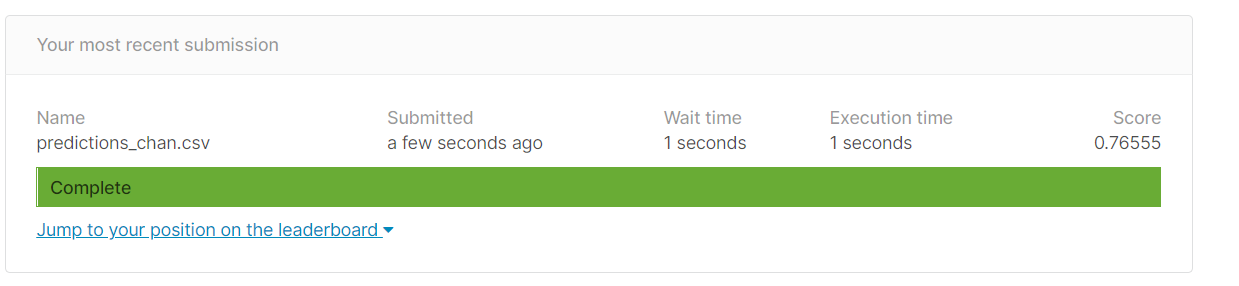

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=0,n_estimators=2,n_jobs=-1)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)
save_preds('predictions_chan_rf.csv', y_pred, df_test)